## Loading Normal Dataset

In [13]:
import pandas as pd
dataset = pd.read_csv("Dataset/combined_features_dataset.csv")

dataset.head()

,RMSE,Zero_Crossing_Rate,Mel_Spectrogram_Mean,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,...,Chroma_11,Chroma_12,Tempo,Jitter,Shimmer,Spectral_Flatness,Spectral_Rolloff,Duration,Silence,Emotion
0,0.014747,0.181806,-49.928920,-565.68760,43.782420,-3.419823,4.879561,-11.828972,-7.854157,-10.851251,...,0.356888,0.346651,123.046875,0.006238,1.162623,0.248231,4459.857647,3.0,0.177989,angry
1,0.010142,0.164250,-53.197456,-605.44180,45.174736,-5.537606,6.142505,-2.014863,-10.605732,-15.667695,...,0.345317,0.357653,103.359375,0.006066,0.915142,0.306430,3734.354342,3.0,0.256070,fearful
2,0.047152,0.237027,-38.741500,-443.21610,24.900938,-30.117960,0.428244,-11.970781,-20.010164,-16.112022,...,0.492545,0.463739,123.046875,0.004500,0.618952,0.068761,5455.354192,3.0,0.000000,fearful
3,0.030824,0.148445,-41.572445,-473.73538,44.729717,-10.718471,6.005490,-12.931274,-14.678432,-5.036605,...,0.286623,0.297752,123.046875,0.005488,0.827023,0.231424,3929.312650,3.0,0.189327,angry
4,0.005151,0.137492,-58.592377,-663.29486,60.307990,1.032603,9.540112,-6.581423,-2.948161,-10.793342,...,0.264617,0.308694,135.999178,0.006102,0.933911,0.316868,3486.059946,3.0,0.267196,disgust


In [90]:
dataset.shape

(15942, 67)

## Handling Missing Values



In [14]:
# Check for missing values in the dataset
missing_values_summary = dataset.isnull().sum()

# Display columns with missing values, if any
missing_values_summary[missing_values_summary > 0]


Series([], dtype: int64)

## Dropping unkwown emotion rows

In [15]:
# drop rows where Emotion is 'unkwown'
dataset = dataset[dataset['Emotion'] != 'unknown']

In [91]:
dataset.shape

(15942, 67)

## Removing Redundant Features (RUN ONLY IF YOU KNOW WHAT TO REMOVE)

In [ ]:
# Dropping redundant features directly from the dataset based on the correlation analysis
redundant_features = [
    'MFCC_1', 'Spectral_Rolloff', 'Jitter', 'Chroma_2', 'Chroma_3', 'Chroma_4',
    'Chroma_5', 'Chroma_6', 'Chroma_7', 'Chroma_8', 'Chroma_9', 'Chroma_10',
    'Chroma_11', 'Spectral_Flatness'
]

# Drop redundant features
dataset = dataset.drop(columns=redundant_features)

# Display the updated dataset structure
print("Updated dataset columns:")
print(dataset.columns)


Updated dataset columns:
Index(['RMSE', 'Zero_Crossing_Rate', 'Mel_Spectrogram_Mean', 'MFCC_2',
       'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9',
       'MFCC_10', 'MFCC_11', 'MFCC_12', 'MFCC_13', 'Delta_MFCC_1',
       'Delta_MFCC_2', 'Delta_MFCC_3', 'Delta_MFCC_4', 'Delta_MFCC_5',
       'Delta_MFCC_6', 'Delta_MFCC_7', 'Delta_MFCC_8', 'Delta_MFCC_9',
       'Delta_MFCC_10', 'Delta_MFCC_11', 'Delta_MFCC_12', 'Delta_MFCC_13',
       'Delta2_MFCC_1', 'Delta2_MFCC_2', 'Delta2_MFCC_3', 'Delta2_MFCC_4',
       'Delta2_MFCC_5', 'Delta2_MFCC_6', 'Delta2_MFCC_7', 'Delta2_MFCC_8',
       'Delta2_MFCC_9', 'Delta2_MFCC_10', 'Delta2_MFCC_11', 'Delta2_MFCC_12',
       'Delta2_MFCC_13', 'Spectral_Centroid', 'Spectral_Bandwidth',
       'Pitch_Mean', 'HNR', 'Spectral_Contrast', 'Chroma_1', 'Chroma_12',
       'Tempo', 'Shimmer', 'Duration', 'Silence', 'Emotion'],
      dtype='object')


## Splitting Data into Train and Test Sets

In [17]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = dataset.drop(columns=['Emotion'])
y = dataset['Emotion']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the sizes of the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 11553 samples
Testing set size: 2889 samples


##  Handling Class Imbalance

In [18]:
from imblearn.over_sampling import SMOTE

# Ensure y_train is a 1D array for SMOTE
y_train = y_train.squeeze()

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the training set
X_train, y_train = smote.fit_resample(X_train, y_train)

# Verify the new class distribution
print("Class distribution after applying SMOTE:")
print(y_train.value_counts())

# Save the updated training data back to the same variables
print("X_train and y_train have been updated with resampled data.")

print("Class imbalance handled using SMOTE.")


Class distribution after applying SMOTE:
Emotion
disgust      2012
neutral      2012
fearful      2012
happy        2012
sad          2012
angry        2012
surprised    2012
Name: count, dtype: int64
X_train and y_train have been updated with resampled data.
Class imbalance handled using SMOTE.


## Normalization of Features

In [19]:
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

# Verify the transformation
print("Training data after normalization:")
print(X_train[:5])

print("Testing data after normalization:")
print(X_test[:5])


Training data after normalization:
[[-3.16822636e-01  3.49931061e-01 -1.75376203e-01 -2.11641943e-01
  -7.02186194e-01  7.63069176e-01  2.61093894e-01  1.15316454e-02
  -5.33262009e-01  7.20017328e-01 -1.17182753e+00  7.36876228e-01
  -9.12991600e-01 -4.51392350e-01  6.17885430e-01 -1.37195502e+00
  -7.49801515e-01  1.30884135e+00 -1.93235275e+00  1.06082511e+00
  -1.06886500e+00 -3.45078852e-01  4.89594177e-01  2.26693648e-01
  -4.24390315e-01  1.14409322e+00  7.56116342e-01 -1.15948991e+00
   4.82568728e-01 -1.25475216e+00  3.70161553e-01  6.29396535e-01
   8.04329596e-01 -1.14984437e+00  7.02041971e-01  1.51395843e+00
  -9.52918570e-01  2.91694897e-02 -3.69166312e-01 -1.19226582e+00
   1.15532655e+00 -4.10146490e-01  6.94608251e-01 -5.93244759e-02
   9.56196401e-01 -8.39617267e-02  4.53225928e-01 -5.55203156e-01
  -6.04516230e-01 -7.20485019e-01 -1.12885613e+00 -8.78014401e-01
  -5.07131532e-01 -2.75595064e-01 -1.76028397e-01 -7.40123213e-01
  -1.32577052e+00 -1.32694545e+00 -8.1140

## Encode the Target Variable

In [20]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training target
y_train = label_encoder.fit_transform(y_train)

# Transform the testing target using the same encoder
y_test = label_encoder.transform(y_test)

# Check the encoded values
print("Classes:", label_encoder.classes_)
print("Encoded y_train:", y_train[:5])
print("Encoded y_test:", y_test[:5])

print("Target variable encoded successfully!")


Classes: ['angry' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']
Encoded y_train: [1 4 4 2 3]
Encoded y_test: [3 3 3 1 0]
Target variable encoded successfully!


## Training Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       491
           1       0.73      0.63      0.68       491
           2       0.54      0.42      0.47       331
           3       0.70      0.74      0.72       491
           4       0.71      0.74      0.72       493
           5       0.70      0.80      0.75       503
           6       0.92      0.91      0.92        89

    accuracy                           0.71      2889
   macro avg       0.73      0.72      0.72      2889
weighted avg       0.71      0.71      0.71      2889


Confusion Matrix:
 [[405  18  14  47   3   2   2]
 [ 26 311  30  34  38  52   0]
 [ 31  28 139  38  32  59   4]
 [ 45  19  23 361  32  11   0]
 [  1  28  22  32 364  46   0]
 [  1  21  28   4  44 404   1]
 [  0   0   0   1   2   5  81]]

Accuracy Score: 0.7147802007615092


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Define the parameter grid for the Random Forest
param_grid = {
    'n_estimators': [200, 300, 500],               # Number of trees in the forest
    'max_depth': [20, 30],                   # Maximum depth of the tree
    'min_samples_split': [5, 10],                   # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2],                     # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None],            # Number of features to consider when looking for the best split         
}

# Instantiate the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all available CPU cores
)

# Perform the grid search
print("Starting Grid Search...")
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Best parameters
print(f"Best parameters: {best_params}")

Starting Grid Search...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  15.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  15.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  15.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  15.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  15.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  22.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  23.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_

In [ ]:
# storing the best parameters
best_params = {
    'max_depth': 30,
    'max_features': 'log2',
    'min_samples_leaf': 1,
    'min_samples_split': 5,
    'n_estimators': 500
}

In [22]:
# Train a new Random Forest with the best parameters
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the final model
classification_report_output = classification_report(y_test, y_pred)
confusion_matrix_output = confusion_matrix(y_test, y_pred)
accuracy_output = accuracy_score(y_test, y_pred)

# Display results
print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)
print("\nClassification Report:\n", classification_report_output)
print("\nConfusion Matrix:\n", confusion_matrix_output)
print("\nTest Set Accuracy:", accuracy_output)

# Save the tuned model
import joblib
joblib.dump(best_rf_model, "best_random_forest_model.pkl")
print("Tuned Random Forest model saved as 'best_random_forest_model.pkl'.")

Best Parameters: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Best Cross-Validation Accuracy: 0.7467730239303842

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       491
           1       0.72      0.64      0.68       491
           2       0.53      0.44      0.48       331
           3       0.70      0.74      0.72       491
           4       0.71      0.73      0.72       493
           5       0.76      0.81      0.78       503
           6       0.74      0.87      0.80        89

    accuracy                           0.72      2889
   macro avg       0.71      0.72      0.71      2889
weighted avg       0.71      0.72      0.72      2889


Confusion Matrix:
 [[410  20   7  43   3   2   6]
 [ 26 315  30  37  38  45   0]
 [ 33  28 144  40  36  45   5]
 [ 40  21  20 364  29   9   8]
 [  0  34  36  29 361  29   4]
 [  0  20  34   3  36 406

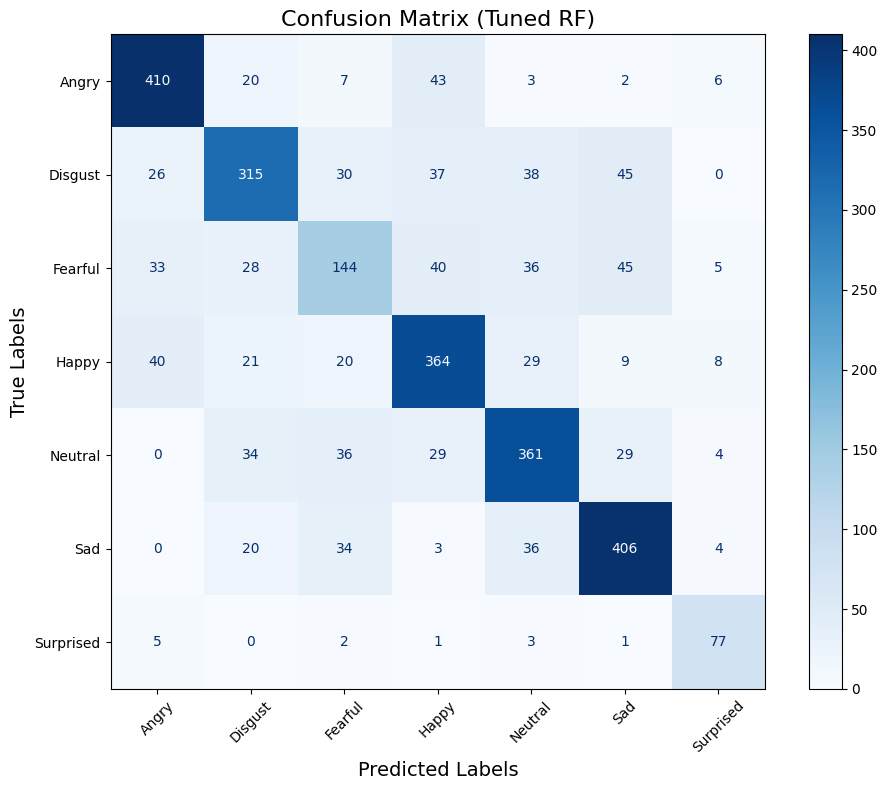

In [1]:
# HARDCODE PRINTING FOR REPORT
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Hardcoded confusion matrix
confusion_matrix = np.array([
    [410, 20, 7, 43, 3, 2, 6],
    [26, 315, 30, 37, 38, 45, 0],
    [33, 28, 144, 40, 36, 45, 5],
    [40, 21, 20, 364, 29, 9, 8],
    [0, 34, 36, 29, 361, 29, 4],
    [0, 20, 34, 3, 36, 406, 4],
    [5, 0, 2, 1, 3, 1, 77]
])

# Class labels
class_names = ["Angry", "Disgust", "Fearful", "Happy", "Neutral", "Sad", "Surprised"]

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=True)

# Formatting
plt.title("Confusion Matrix (Tuned RF)", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Data Augmentation

In [50]:
import os
import librosa
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

# Define raw audio directories
crema_d_audio_dir = "Dataset/CREMA-D"
ravdess_audio_dir = "Dataset/RAVDESS"
tess_audio_dir = "Dataset/TESS"
savee_audio_dir = "Dataset/SAVEE"

# Load combined features dataset
dataset = pd.read_csv("Dataset/combined_features_dataset.csv")

# Define target duration and sampling rate
target_duration = 3.0  # in seconds
target_sampling_rate = 22050  # in Hz

# Define augmentation techniques
def augment_audio(audio, sr):
    """Apply audio augmentation techniques to a single audio clip."""
    augmented_audios = []

    # 1. Pitch Shifting
    pitch_shifted = librosa.effects.pitch_shift(audio, sr=sr, n_steps=2)
    augmented_audios.append(pitch_shifted)

    # 2. Time Stretching
    time_stretched = librosa.effects.time_stretch(audio, rate=1.1)
    augmented_audios.append(time_stretched)

    # 3. Noise Injection
    noise = np.random.normal(0, 0.005, audio.shape)
    noise_injected = audio + noise
    augmented_audios.append(noise_injected)

    return augmented_audios

# Function to preprocess audio
def preprocess_audio(audio_path):
    audio, sr = librosa.load(audio_path, sr=target_sampling_rate)
    target_length = int(target_duration * target_sampling_rate)

    if len(audio) < target_length:
        audio = np.pad(audio, (0, target_length - len(audio)))
    else:
        audio = audio[:target_length]

    return audio, sr

# Function to extract features (updated to include additional features)
def extract_features(audio, sr):
    FRAME_LENGTH = 1024
    HOP_LENGTH = 512

    features = {}

    # RMSE
    rms = librosa.feature.rms(y=audio, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH).mean()
    features['RMSE'] = rms

    # Zero Crossing Rate
    zcr = librosa.feature.zero_crossing_rate(y=audio, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH).mean()
    features['Zero_Crossing_Rate'] = zcr

    # Mel Spectrogram
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=1024, hop_length=HOP_LENGTH, n_mels=90)
    mel_spec_db = librosa.power_to_db(mel_spec).mean()
    features['Mel_Spectrogram_Mean'] = mel_spec_db

    # MFCCs and derivatives
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13, n_fft=1024, hop_length=HOP_LENGTH)
    mfccs_mean = mfccs.mean(axis=1)
    delta_mfccs = librosa.feature.delta(mfccs)
    delta2_mfccs = librosa.feature.delta(mfccs, order=2)
    features.update({f'MFCC_{i+1}': val for i, val in enumerate(mfccs_mean)})
    features.update({f'Delta_MFCC_{i+1}': val for i, val in enumerate(delta_mfccs.mean(axis=1))})
    features.update({f'Delta2_MFCC_{i+1}': val for i, val in enumerate(delta2_mfccs.mean(axis=1))})

    # Spectral Centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr, n_fft=1024, hop_length=HOP_LENGTH).mean()
    features['Spectral_Centroid'] = spectral_centroid

    # Spectral Bandwidth
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr, n_fft=1024, hop_length=HOP_LENGTH).mean()
    features['Spectral_Bandwidth'] = spectral_bandwidth

    # Pitch (Fundamental Frequency)
    pitches, magnitudes = librosa.piptrack(y=audio, sr=sr, n_fft=1024, hop_length=HOP_LENGTH)
    pitch_mean = np.mean(pitches[pitches > 0]) if np.any(pitches > 0) else 0
    features['Pitch_Mean'] = pitch_mean

    # Harmonic-to-Noise Ratio (HNR)
    harmonic, percussive = librosa.effects.hpss(audio)
    hnr = 10 * np.log10(np.mean(harmonic**2) / np.mean(percussive**2)) if np.mean(percussive**2) > 0 else 0
    features['HNR'] = hnr

    # Spectral Contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sr, n_fft=1024, hop_length=HOP_LENGTH).mean()
    features['Spectral_Contrast'] = spectral_contrast

    # Chroma Features
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr, n_fft=1024, hop_length=HOP_LENGTH).mean(axis=1)
    features.update({f'Chroma_{i+1}': val for i, val in enumerate(chroma)})

    # Tempo (Rhythm)
    onset_env = librosa.onset.onset_strength(y=audio, sr=sr, hop_length=HOP_LENGTH)
    tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr).item()
    features['Tempo'] = tempo

    # Jitter and Shimmer (Approximation)
    jitter = np.std(np.diff(pitches[pitches > 0])) / pitch_mean if pitch_mean > 0 else 0
    shimmer = np.std(np.abs(np.diff(audio))) / np.mean(np.abs(audio)) if np.mean(np.abs(audio)) > 0 else 0
    features['Jitter'] = jitter
    features['Shimmer'] = shimmer

    # Tonality and Timbre
    spectral_flatness = librosa.feature.spectral_flatness(y=audio).mean()
    features['Spectral_Flatness'] = spectral_flatness

    spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr, n_fft=1024, hop_length=HOP_LENGTH).mean()
    features['Spectral_Rolloff'] = spectral_rolloff

    # Duration and Silence
    duration = librosa.get_duration(y=audio, sr=sr)
    silence = np.mean(audio == 0)
    features['Duration'] = duration
    features['Silence'] = silence

    return features

# Function to process datasets and augment
def process_and_augment_dataset(audio_dir, emotion_mapping, num_samples):
    augmented_data = []
    processed_files = 0

    for root, _, files in os.walk(audio_dir):
        for file in files:
            if processed_files >= num_samples:
                break

            if file.endswith('.wav'):
                try:
                    file_path = os.path.join(root, file)
                    emotion_code = file.split('-')[2] if 'RAVDESS' in audio_dir else file.split('_')[1][:2]
                    emotion = emotion_mapping.get(emotion_code, "unknown")

                    # Preprocess audio
                    audio, sr = preprocess_audio(file_path)

                    # Apply augmentations
                    augmented_audios = augment_audio(audio, sr)

                    for aug_audio in augmented_audios:
                        features = extract_features(aug_audio, sr)
                        features['Emotion'] = emotion
                        augmented_data.append(features)

                    processed_files += 1
                except (IndexError, KeyError):
                    continue

    return pd.DataFrame(augmented_data)

# Emotion mappings for each dataset
ravdess_emotion_mapping = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

crema_d_emotion_mapping = {
    "ANG": "angry",
    "DIS": "disgust",
    "FEA": "fearful",
    "HAP": "happy",
    "NEU": "neutral",
    "SAD": "sad"
}

tess_emotion_mapping = {
    "neutral": "neutral",
    "happy": "happy",
    "sad": "sad",
    "angry": "angry",
    "fear": "fearful",
    "disgust": "disgust",
    "ps": "surprised"
}

savee_emotion_mapping = {
    "n": "neutral",
    "h": "happy",
    "sa": "sad",
    "a": "angry",
    "f": "fearful",
    "d": "disgust",
    "su": "surprised"
}

# Number of samples per dataset for augmentation
num_samples_per_dataset = 400

# Process and augment a subset of each dataset
augmented_crema_d = process_and_augment_dataset(crema_d_audio_dir, crema_d_emotion_mapping, num_samples_per_dataset)
augmented_ravdess = process_and_augment_dataset(ravdess_audio_dir, ravdess_emotion_mapping, num_samples_per_dataset)
augmented_tess = process_and_augment_dataset(tess_audio_dir, tess_emotion_mapping, num_samples_per_dataset)
augmented_savee = process_and_augment_dataset(savee_audio_dir, savee_emotion_mapping, num_samples_per_dataset)

# Combine all augmented datasets
augmented_dataset = pd.concat([augmented_crema_d, augmented_ravdess, augmented_tess, augmented_savee], ignore_index=True)

# Concatenate with the original combined dataset
dataset = pd.concat([dataset, augmented_dataset], ignore_index=True)

# Save the updated dataset
dataset.to_csv("Dataset/augmented_combined_features_dataset.csv", index=False)

print("Data augmentation and feature extraction completed. Dataset updated.")


/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_14553/2091725922.py:109: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr).item()


Data augmentation and feature extraction completed. Dataset updated.


## Loading Augmented Dataset

In [79]:
import pandas as pd
dataset = pd.read_csv("Dataset/augmented_combined_features_dataset.csv")

## Handling Missing Values



In [80]:
# Check for missing values in the dataset
missing_values_summary = dataset.isnull().sum()

# Display columns with missing values, if any
missing_values_summary[missing_values_summary > 0]


Series([], dtype: int64)

## Dropping unkwown emotion rows

In [81]:
# drop rows where Emotion is 'unkwown'
dataset = dataset[dataset['Emotion'] != 'unknown']

## Removing Redundant Features (RUN ONLY IF YOU KNOW WHAT TO REMOVE)

In [ ]:
# Dropping redundant features directly from the dataset based on the correlation analysis
redundant_features = [
    'MFCC_1', 'Spectral_Rolloff', 'Jitter', 'Chroma_2', 'Chroma_3', 'Chroma_4',
    'Chroma_5', 'Chroma_6', 'Chroma_7', 'Chroma_8', 'Chroma_9', 'Chroma_10',
    'Chroma_11', 'Spectral_Flatness'
]

# Drop redundant features
dataset = dataset.drop(columns=redundant_features)

# Display the updated dataset structure
print("Updated dataset columns:")
print(dataset.columns)


Updated dataset columns:
Index(['RMSE', 'Zero_Crossing_Rate', 'Mel_Spectrogram_Mean', 'MFCC_2',
       'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9',
       'MFCC_10', 'MFCC_11', 'MFCC_12', 'MFCC_13', 'Delta_MFCC_1',
       'Delta_MFCC_2', 'Delta_MFCC_3', 'Delta_MFCC_4', 'Delta_MFCC_5',
       'Delta_MFCC_6', 'Delta_MFCC_7', 'Delta_MFCC_8', 'Delta_MFCC_9',
       'Delta_MFCC_10', 'Delta_MFCC_11', 'Delta_MFCC_12', 'Delta_MFCC_13',
       'Delta2_MFCC_1', 'Delta2_MFCC_2', 'Delta2_MFCC_3', 'Delta2_MFCC_4',
       'Delta2_MFCC_5', 'Delta2_MFCC_6', 'Delta2_MFCC_7', 'Delta2_MFCC_8',
       'Delta2_MFCC_9', 'Delta2_MFCC_10', 'Delta2_MFCC_11', 'Delta2_MFCC_12',
       'Delta2_MFCC_13', 'Spectral_Centroid', 'Spectral_Bandwidth',
       'Pitch_Mean', 'HNR', 'Spectral_Contrast', 'Chroma_1', 'Chroma_12',
       'Tempo', 'Shimmer', 'Duration', 'Silence', 'Emotion'],
      dtype='object')


## Splitting Data into Train and Test Sets

In [82]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = dataset.drop(columns=['Emotion'])
y = dataset['Emotion']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the sizes of the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 12753 samples
Testing set size: 3189 samples


##  Handling Class Imbalance

In [83]:
from imblearn.over_sampling import SMOTE

# Ensure y_train is a 1D array for SMOTE
y_train = y_train.squeeze()

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the training set
X_train, y_train = smote.fit_resample(X_train, y_train)

# Verify the new class distribution
print("Class distribution after applying SMOTE:")
print(y_train.value_counts())

# Save the updated training data back to the same variables
print("X_train and y_train have been updated with resampled data.")

print("Class imbalance handled using SMOTE.")


Class distribution after applying SMOTE:
Emotion
happy        2259
sad          2259
disgust      2259
fearful      2259
surprised    2259
angry        2259
neutral      2259
calm         2259
Name: count, dtype: int64
X_train and y_train have been updated with resampled data.
Class imbalance handled using SMOTE.


## Normalization of Features

In [84]:
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

# Verify the transformation
print("Training data after normalization:")
print(X_train[:5])

print("Testing data after normalization:")
print(X_test[:5])


Training data after normalization:
[[ 2.25553096e+00 -2.86881416e-01  1.51591043e+00  1.54810454e+00
   4.60109358e-03  3.99820206e-01  2.70770290e-01  5.20080234e-03
   1.28931508e-01  7.42699205e-01  1.69486588e-01 -1.32810356e+00
   8.87126740e-02 -6.96839418e-01 -9.18708011e-01  8.02780858e-01
   9.58990076e-02 -4.76035079e-01 -1.15287776e+00 -7.15085243e-01
  -1.50271850e+00 -3.55771161e-01 -8.11169470e-01 -2.27438371e-02
  -1.85901910e-01  2.01360929e-01  2.06069760e-01  5.46749460e-01
   7.74300725e-01  3.76875585e-01 -2.89806408e-01  1.15298616e-01
  -6.39637628e-02 -4.80202543e-01 -3.82915961e-01 -7.88434519e-01
  -6.08394039e-01 -6.31816216e-01 -1.57177100e-01 -6.45510976e-02
   1.75782037e-01  3.80538116e-01 -3.65210017e-01 -4.49744805e-01
   1.44053559e-01  1.04052409e+00  1.38672963e+00 -9.05263946e-01
  -5.04394518e-01 -1.05479177e+00 -1.16603961e+00 -1.11903722e+00
  -8.99086331e-01 -9.32101181e-01 -6.55567021e-01 -1.21985190e-01
  -1.16312326e-01 -5.24715088e-01 -8.9802

## Encode the Target Variable

In [85]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training target
y_train = label_encoder.fit_transform(y_train)

# Transform the testing target using the same encoder
y_test = label_encoder.transform(y_test)

# Check the encoded values
print("Classes:", label_encoder.classes_)
print("Encoded y_train:", y_train[:5])
print("Encoded y_test:", y_test[:5])

print("Target variable encoded successfully!")


Classes: ['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']
Encoded y_train: [4 6 6 2 3]
Encoded y_test: [0 4 0 7 7]
Target variable encoded successfully!


## Training Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       524
           1       0.50      0.97      0.66        31
           2       0.70      0.65      0.67       524
           3       0.53      0.45      0.49       363
           4       0.71      0.65      0.68       522
           5       0.69      0.72      0.71       508
           6       0.75      0.74      0.74       565
           7       0.75      0.95      0.83       152

    accuracy                           0.70      3189
   macro avg       0.68      0.75      0.70      3189
weighted avg       0.70      0.70      0.70      3189


Confusion Matrix:
 [[443   0  17   9  38   6   1  10]
 [  0  30   0   0   0   1   0   0]
 [ 28   3 339  18  36  50  42   8]
 [ 43   3  19 165  28  38  57  10]
 [ 55   1  28  47 340  29  10  12]
 [  1   8  37  32  31 368  28   3]
 [  1  14  39  39   6  42 418   6]
 [  0   1   2   0   2   0   3 144]]

Accuracy Score: 0.70460

## Hyperparameter tuning

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Define the parameter grid for the Random Forest
param_grid = {
    'n_estimators': [300, 500],               # Number of trees in the forest
    'max_depth': [30, 50],                   # Maximum depth of the tree
    'min_samples_split': [5, 10],                   # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2],                     # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],            # Number of features to consider when looking for the best split         
}

# Instantiate the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all available CPU cores
)

# Perform the grid search
print("Starting Grid Search...")
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Best parameters
print(f"Best parameters: {best_params}")

Starting Grid Search...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  31.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  31.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  31.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  31.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  31.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=  52.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=  52.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_

In [74]:
# storing the best parameters: take1, accuracy = 0.703
best_params = {
    'n_estimators':300,
    'max_depth': 30,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 5,
}

In [ ]:
# storing the best parameters
best_params = {
    'max_depth': 30,
    'max_features': 'log2',
    'min_samples_leaf': 1,
    'min_samples_split': 5,
    'n_estimators': 500
}

In [75]:
# Train a new Random Forest with the best parameters
#best_rf_model = grid_search.best_estimator_

best_rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42  # For reproducibility
)

# Train the model
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the final model
classification_report_output = classification_report(y_test, y_pred)
confusion_matrix_output = confusion_matrix(y_test, y_pred)
accuracy_output = accuracy_score(y_test, y_pred)

# Display results
print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)
print("\nClassification Report:\n", classification_report_output)
print("\nConfusion Matrix:\n", confusion_matrix_output)
print("\nTest Set Accuracy:", accuracy_output)


Best Parameters: {'n_estimators': 300, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Cross-Validation Accuracy: 0.794379793962468

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80       524
           1       0.52      0.97      0.67        31
           2       0.72      0.66      0.69       524
           3       0.53      0.42      0.47       363
           4       0.71      0.66      0.69       522
           5       0.70      0.74      0.72       508
           6       0.74      0.75      0.74       565
           7       0.75      0.95      0.84       152

    accuracy                           0.71      3189
   macro avg       0.68      0.75      0.70      3189
weighted avg       0.70      0.71      0.70      3189


Confusion Matrix:
 [[437   0  19  10  42   5   1  10]
 [  0  30   0   0   0   1   0   0]
 [ 28   1 346  20  34  45  43   7]
 [ 42   3  20 154  31 

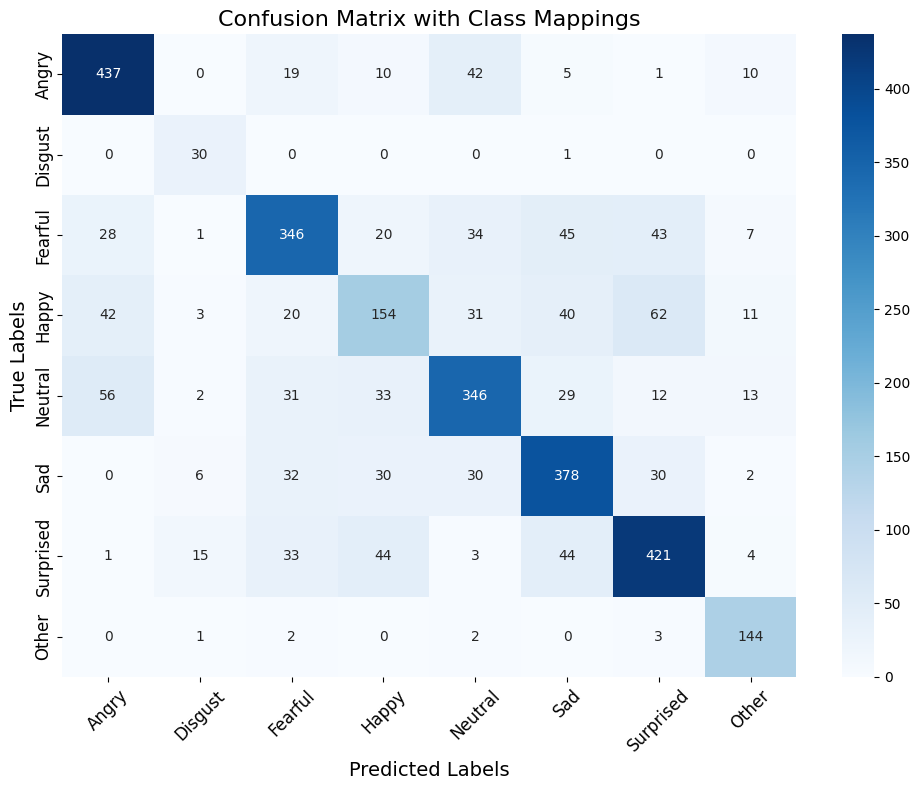

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Hardcoded confusion matrix
confusion_matrix = np.array([
    [437,   0,  19,  10,  42,   5,   1,  10],
    [  0,  30,   0,   0,   0,   1,   0,   0],
    [ 28,   1, 346,  20,  34,  45,  43,   7],
    [ 42,   3,  20, 154,  31,  40,  62,  11],
    [ 56,   2,  31,  33, 346,  29,  12,  13],
    [  0,   6,  32,  30,  30, 378,  30,   2],
    [  1,  15,  33,  44,   3,  44, 421,   4],
    [  0,   1,   2,   0,   2,   0,   3, 144]
])

# Class labels with mappings
class_labels = [
    "Angry", 
    "Disgust", 
    "Fearful", 
    "Happy", 
    "Neutral", 
    "Sad", 
    "Surprised", 
    "Other"
]

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Adding labels, title, and formatting
plt.title("Confusion Matrix with Class Mappings", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, f1_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.datasets import make_classification
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd

# Define best parameters
best_params = {
    'n_estimators': 300,
    'max_depth': 30,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 5,
}

# Initialize the model with the best parameters
best_rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    class_weight="balanced",  # Adjust class weights automatically
    random_state=42  # For reproducibility
)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# To store metrics
fold_accuracies = []
fold_macro_f1_scores = []

# Perform 5-Fold Cross-Validation
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
    print(f"Processing Fold {fold + 1}...")
    
    # Split the data for this fold using array slicing
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
    
    # Train the model on the training fold
    best_rf_model.fit(X_train_fold, y_train_fold)
    
    # Validate on the validation fold
    y_pred_fold = best_rf_model.predict(X_val_fold)
    
    # Compute metrics for this fold
    fold_accuracy = accuracy_score(y_val_fold, y_pred_fold)
    fold_macro_f1 = f1_score(y_val_fold, y_pred_fold, average='macro')
    fold_accuracies.append(fold_accuracy)
    fold_macro_f1_scores.append(fold_macro_f1)
    
    print(f"Fold {fold + 1} Accuracy: {fold_accuracy}")
    print(f"Fold {fold + 1} Macro F1-Score: {fold_macro_f1}")

# Compute average accuracy and macro F1-score across all folds
average_cv_accuracy = np.mean(fold_accuracies)
average_macro_f1_score = np.mean(fold_macro_f1_scores)

# Final Test Evaluation
print("\nTraining Final Model on Entire Training Set...")
best_rf_model.fit(X_train, y_train)

# Evaluate on the test set
y_test_pred = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_macro_f1_score = f1_score(y_test, y_test_pred, average='macro')
test_classification_report = classification_report(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

# Results Summary
print("\nResults Summary:")
print(f"Cross-Validation Fold Accuracies: {fold_accuracies}")
print(f"Average Cross-Validation Accuracy: {average_cv_accuracy}")
print(f"Cross-Validation Macro F1-Scores: {fold_macro_f1_scores}")
print(f"Average Cross-Validation Macro F1-Score: {average_macro_f1_score}")
print(f"\nTest Set Accuracy: {test_accuracy}")
print(f"Test Set Macro F1-Score: {test_macro_f1_score}")
print(f"\nTest Set Classification Report:\n{test_classification_report}")
print(f"\nTest Set Confusion Matrix:\n{test_confusion_matrix}")



Processing Fold 1...
Fold 1 Accuracy: 0.7886583679114799
Fold 1 Macro F1-Score: 0.7862379157370236
Processing Fold 2...
Fold 2 Accuracy: 0.8
Fold 2 Macro F1-Score: 0.7975688173808336
Processing Fold 3...
Fold 3 Accuracy: 0.796070835639181
Fold 3 Macro F1-Score: 0.7939226063571071
Processing Fold 4...
Fold 4 Accuracy: 0.7850027670171555
Fold 4 Macro F1-Score: 0.7816558759798349
Processing Fold 5...
Fold 5 Accuracy: 0.7814056447149972
Fold 5 Macro F1-Score: 0.777875779429804

Training Final Model on Entire Training Set...

Results Summary:
Cross-Validation Fold Accuracies: [0.7886583679114799, 0.8, 0.796070835639181, 0.7850027670171555, 0.7814056447149972]
Average Cross-Validation Accuracy: 0.7902275230565627
Cross-Validation Macro F1-Scores: [0.7862379157370236, 0.7975688173808336, 0.7939226063571071, 0.7816558759798349, 0.777875779429804]
Average Cross-Validation Macro F1-Score: 0.7874521989769206

Test Set Accuracy: 0.7074317968015051
Test Set Macro F1-Score: 0.7026184708357051

Test 

In [89]:
# Save the tuned model
import joblib
joblib.dump(best_rf_model, "best_random_forest_model.pkl")
print("Tuned Random Forest model saved as 'best_random_forest_model.pkl'.")

Tuned Random Forest model saved as 'best_random_forest_model.pkl'.
